# Linear Discriminant Analysis

## Resources

[Linear Discriminant Analysis by IBM](https://developer.ibm.com/tutorials/awb-implementing-linear-discriminant-analysis-python/)

[Implementing Linear Discriminant Analysis in python by IBM](https://developer.ibm.com/tutorials/awb-implementing-linear-discriminant-analysis-python/)

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Column names
cls = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

dataset = pd.read_csv(url, names=cls)

## Preprocessing

In [3]:
# Splitting
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)


## EDA

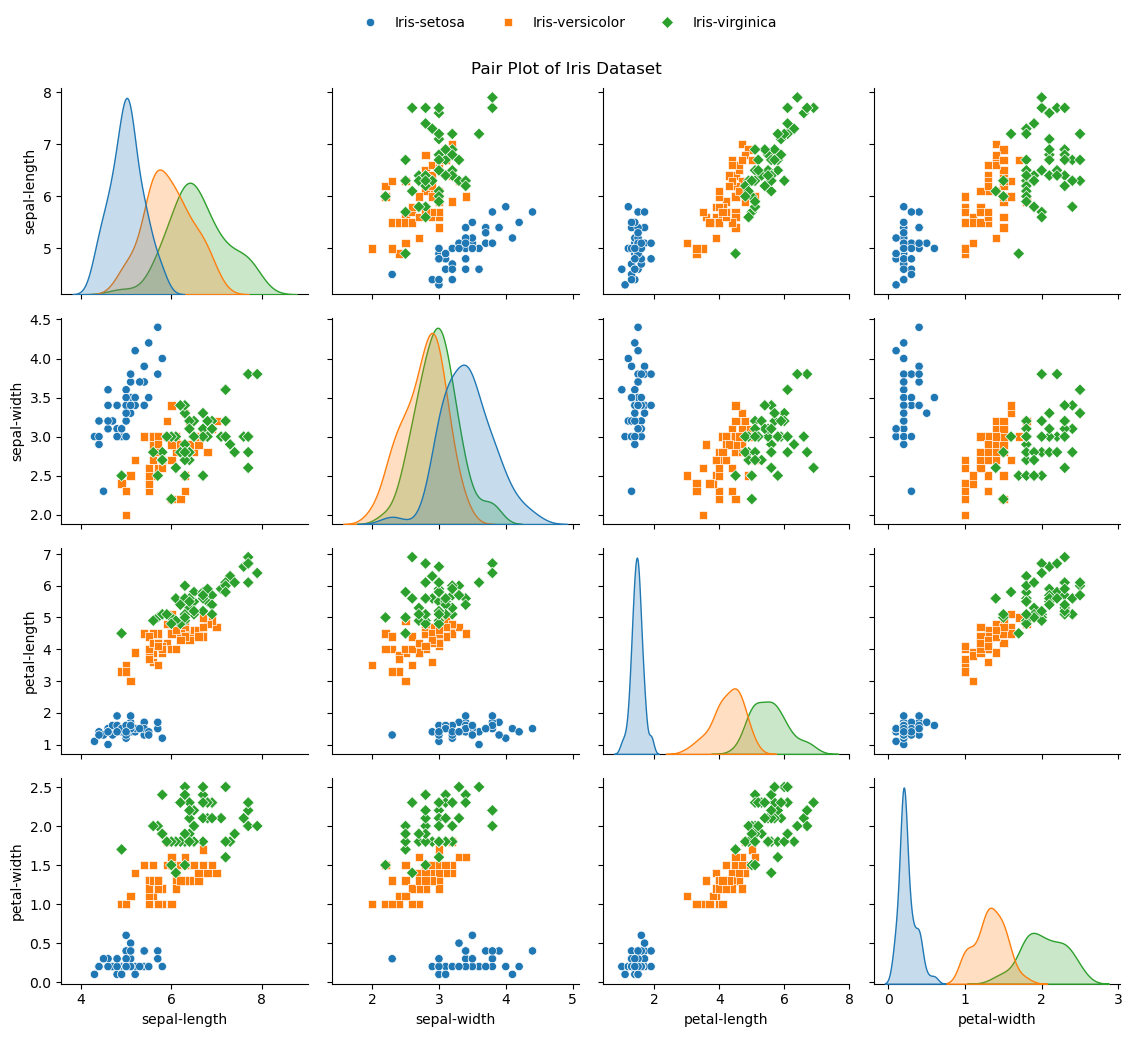

In [5]:
# Relationships between different features and species.
ax = sns.pairplot(dataset, hue='Class', markers=["o", "s", "D"])
plt.suptitle("Pair Plot of Iris Dataset")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.tight_layout()
plt.show()

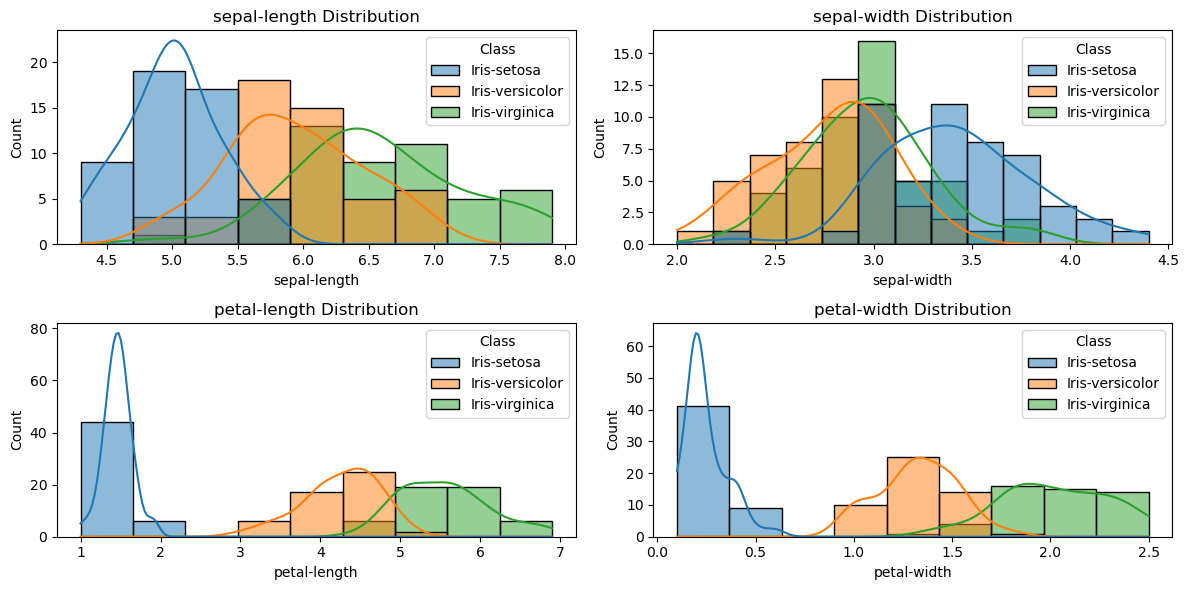

In [7]:
# Distribution of each featurecorrelation_matrix = dataset.corr(numeric_only = True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
correlation_matrix = dataset.corr(numeric_only = True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(12, 6))
for i, feature in enumerate(cls[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=dataset, x=feature, hue='Class', kde=True)
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()

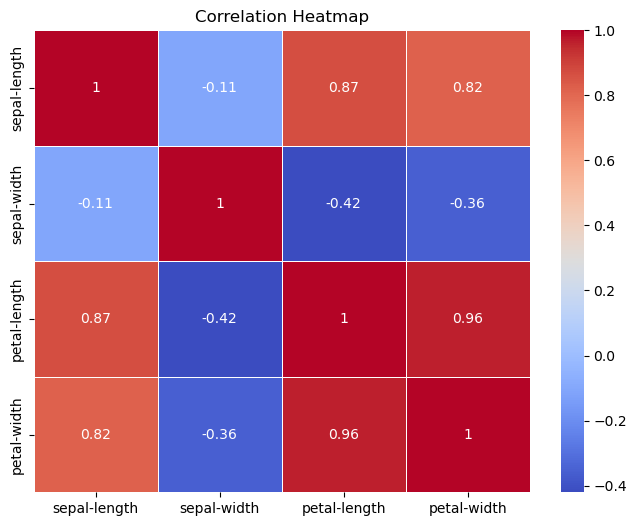

In [8]:
correlation_matrix = dataset.corr(numeric_only = True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [9]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## LDA

In [10]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

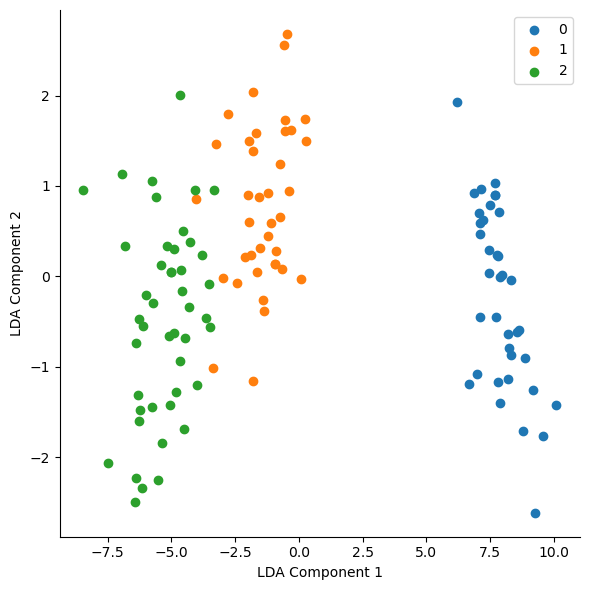

In [11]:
tmp_Df = pd.DataFrame(X_train, columns=['LDA Component 1','LDA Component 2'])
tmp_Df['Class']=y_train

sns.FacetGrid(tmp_Df, hue ="Class",
              height = 6).map(plt.scatter,
                              'LDA Component 1',
                              'LDA Component 2')

plt.legend(loc='upper right')

## Prediction

In [12]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## Evaluation

Accuracy: 0.97


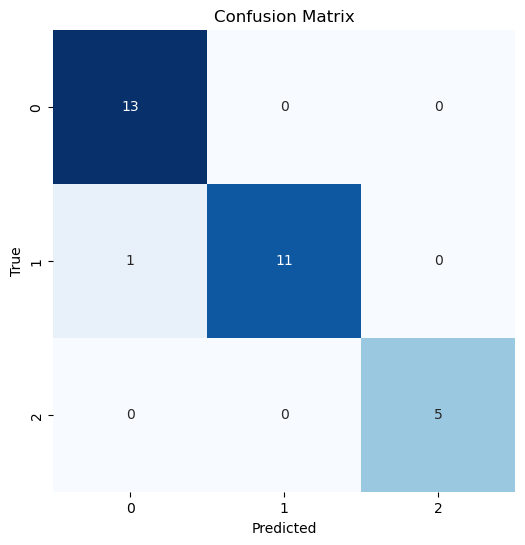

In [13]:
accuracy = accuracy_score(y_test, y_pred)
conf_m = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

plt.figure(figsize=(6, 6))
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()